In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/spotify1921-2020.csv')
df

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.4720,2020


In [3]:
# TODO decide about artists and how to make features our of them

## Data Fixing

In [4]:
# we remove the release_date column as its format is not consistent across all records
# some records have the complete date, some have the year only - we take the year only
df = df.drop(columns=['release_date'])
# we remove id, song name and artist name as they are not useful for our analysis
df = df.drop(columns=['id', 'name', 'artists'])

# we mark our treatment as the "explicit" column and our effect as the popularity column
# (treatment is binary and popularity ranges from 0 to 100)
df = df.rename(columns={'explicit': 'treatment', 'popularity': 'effect'})
# reorder all the columns
df = pd.concat([df.loc[:, ~df.columns.isin(['treatment', 'effect'])], df.loc[:, ['treatment', 'effect']]], axis=1)
df

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year,treatment,effect
0,0.9950,0.708,158648,0.1950,0.563000,10,0.1510,-12.428,1,0.0506,118.469,0.7790,1928,0,0
1,0.9940,0.379,282133,0.0135,0.901000,8,0.0763,-28.454,1,0.0462,83.972,0.0767,1928,0,0
2,0.6040,0.749,104300,0.2200,0.000000,5,0.1190,-19.924,0,0.9290,107.177,0.8800,1928,0,0
3,0.9950,0.781,180760,0.1300,0.887000,1,0.1110,-14.734,0,0.0926,108.003,0.7200,1928,0,0
4,0.9900,0.210,687733,0.2040,0.908000,11,0.0980,-16.829,1,0.0424,62.149,0.0693,1928,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,0.875,163800,0.4430,0.000032,1,0.0891,-7.461,1,0.1430,100.012,0.3060,2020,1,75
169905,0.0167,0.719,167468,0.3850,0.031300,8,0.1110,-10.907,1,0.0403,128.000,0.2700,2020,0,64
169906,0.5380,0.514,180700,0.5390,0.002330,7,0.1080,-9.332,1,0.1050,123.700,0.1530,2020,0,70
169907,0.0714,0.646,167308,0.7610,0.000000,1,0.2220,-2.557,1,0.0385,129.916,0.4720,2020,0,70


## Data Analysis

In [32]:
df.describe(percentiles=[]).iloc[1:]

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year,treatment,effect
mean,0.493214,0.538150,2.314062e+05,0.488593,0.161937,5.200519,0.206690,-11.370289,0.708556,0.094058,116.948017,0.532095,1977.223231,0.084863,31.556610
std,0.376627,0.175346,1.213219e+05,0.267390,0.309329,3.515257,0.176796,5.666765,0.454429,0.149937,30.726937,0.262408,25.593168,0.278679,21.582614
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,1921.000000,0.000000,0.000000
50%,0.492000,0.548000,2.086000e+05,0.481000,0.000204,5.000000,0.135000,-10.474000,1.000000,0.045000,114.778000,0.544000,1978.000000,0.000000,33.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,0.969000,244.091000,1.000000,2020.000000,1.000000,100.000000


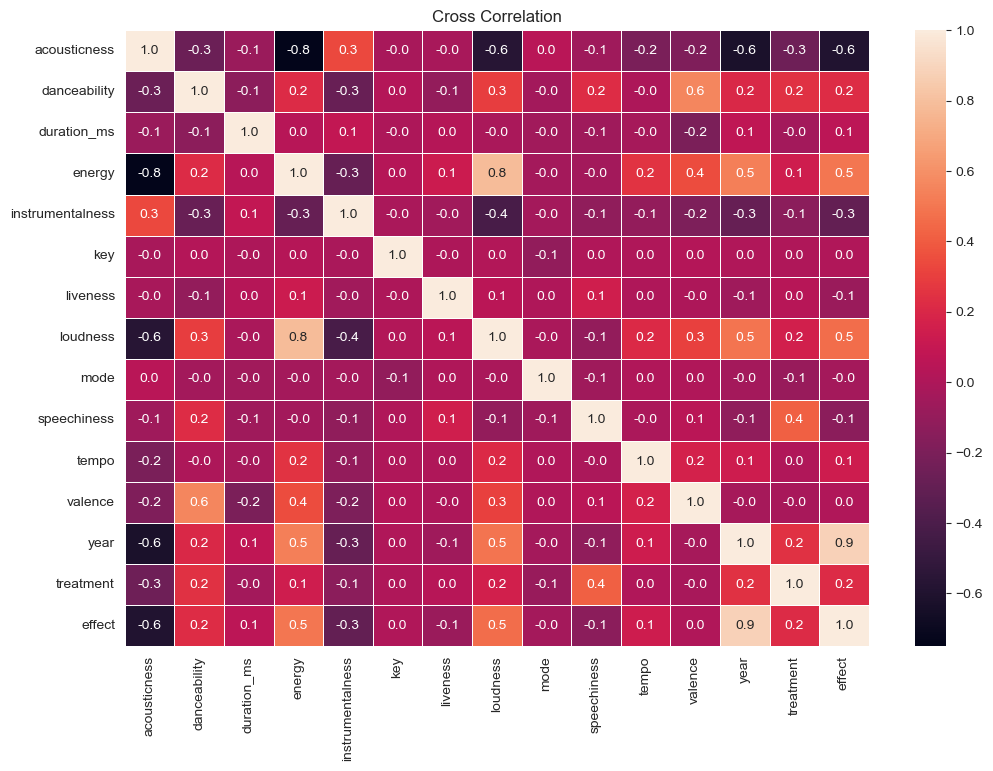

In [26]:
# cross correlation between our features, the treatment and the effect
# plot as matplotlib heatmap
import matplotlib.pyplot as plt
import seaborn as sns
_, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)
ax.title.set_text('Cross Correlation')
plt.show()

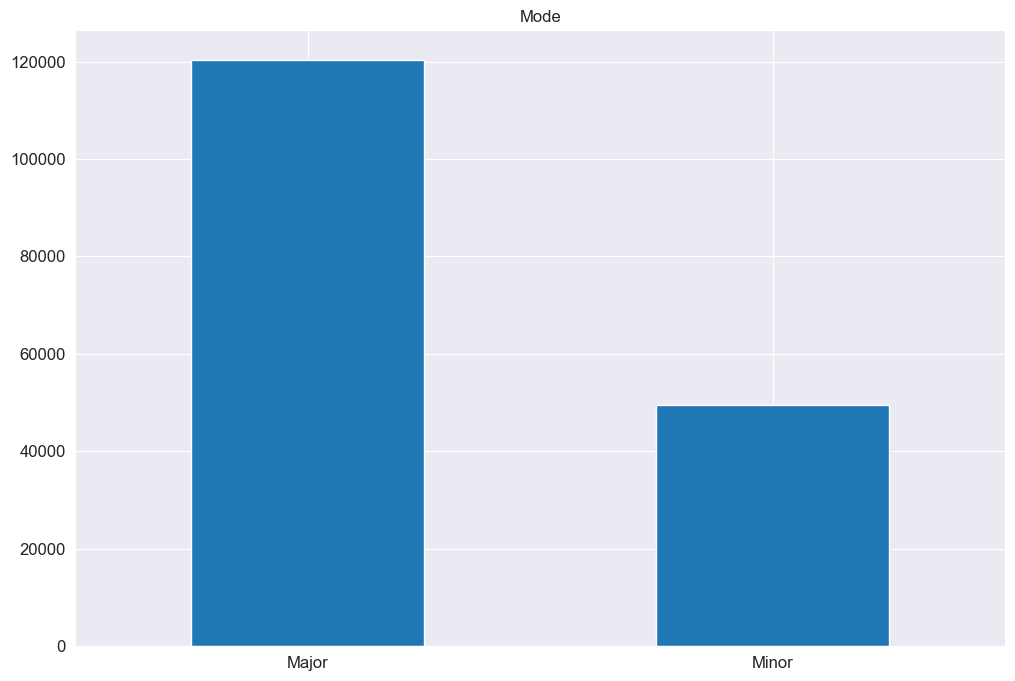

In [7]:
# plot histogram of mode column
_, ax = plt.subplots(figsize=(14, 10))
df['mode'].value_counts().plot(kind='bar', title='Mode Histogram', figsize=(12, 8), fontsize=12, ax=ax)
plt.xticks(rotation=0)
ax.set_xticklabels(['Major', 'Minor'])
plt.show()

As we can see, the mode is mostly major

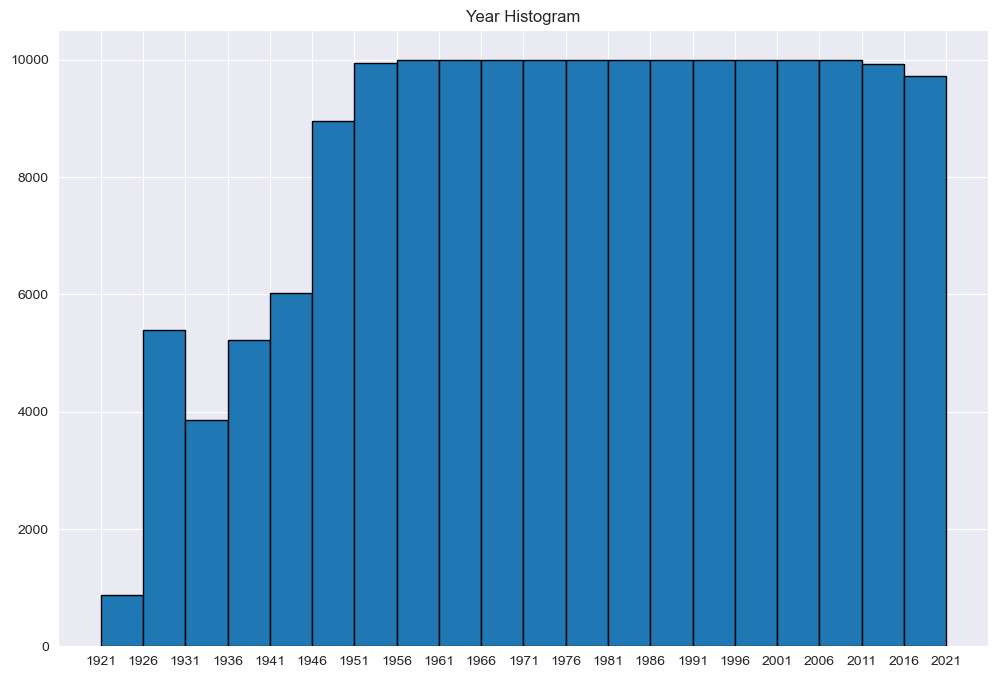

In [29]:
# plot histogram of year column
_, ax = plt.subplots(figsize=(12, 8))
bins = list(range(1921, 2022, 5))
plt.hist(df.year.values, bins=bins, edgecolor="k")
plt.xticks(bins)
ax.title.set_text('Year Histogram')
plt.show()

The amount of records per year is capped at 2,000 (data includes top 2000 songs of each year)
As we can see, early years have a lower number of records, and also the last 10 years has little less records (the difference is not significant)

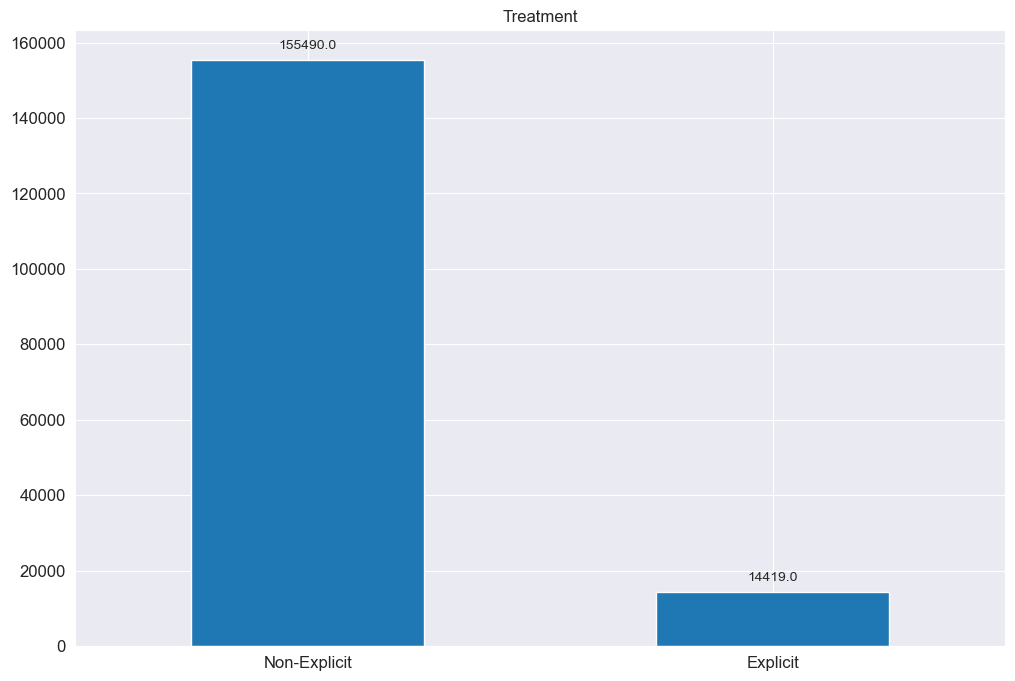

In [16]:
# plot histogram of treatment column
_, ax = plt.subplots(figsize=(12, 8))
df['treatment'].value_counts().plot(kind='bar', title='Treatment Histogram', figsize=(12, 8), fontsize=12, ax=ax)
plt.xticks(rotation=0)
ax.set_xticklabels(['Non-Explicit', 'Explicit'])
# add values to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

As we can see, the treatment is mostly non-explicit, however, there are around 14K records, which will be enough for our analysis

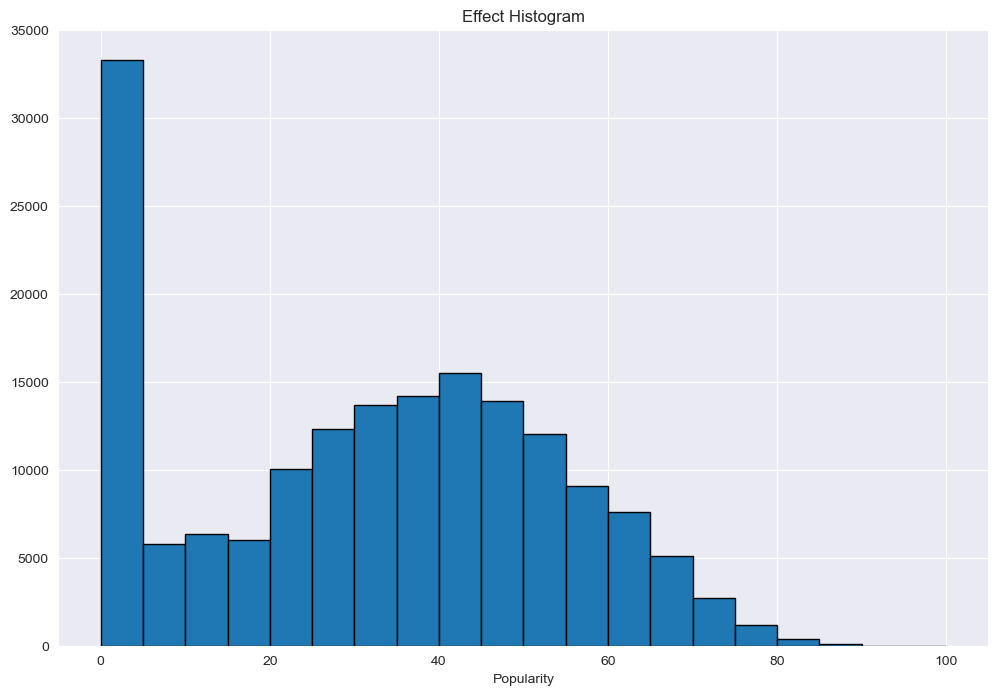

In [31]:
# plot histogram of effect column
_, ax = plt.subplots(figsize=(12, 8))
bins = list(range(0, 101, 5))
plt.hist(df.effect.values, bins=bins, edgecolor="k")
ax.set_xlabel('Popularity')
plt.xticks(rotation=0)
ax.title.set_text('Effect Histogram')
plt.show()

As we can see, there is a high value for 0-5, however, the distribution is still normal with median around 45-50
This sets the question, why are there so many records with popularity 0-5?
we will check in the next graph, whether it is because early years have lower popularity (due to unrecorded popularity maybe)

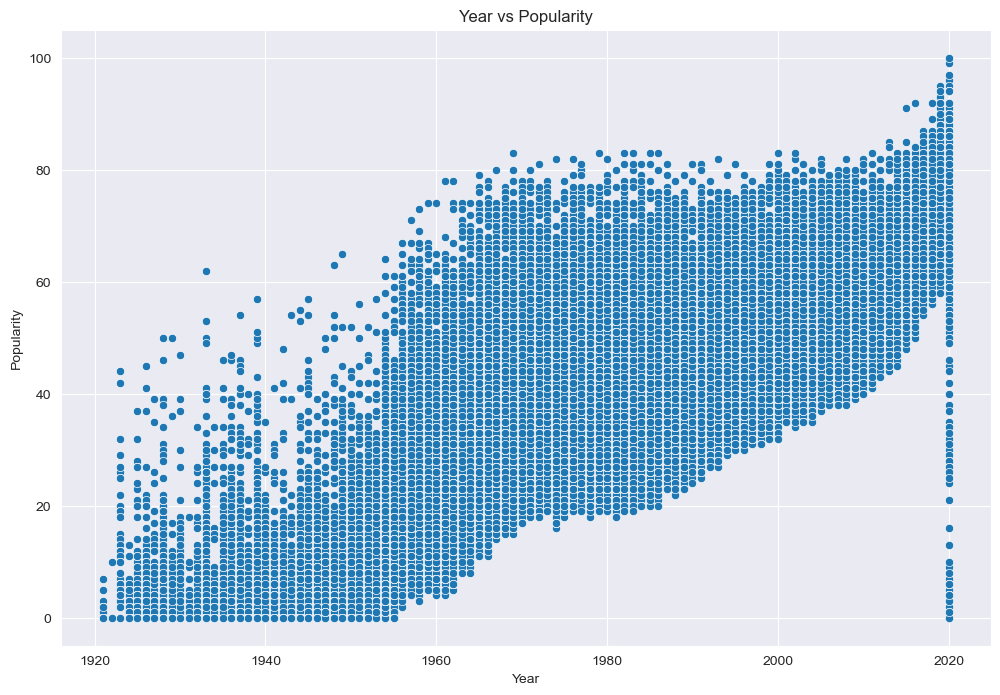

In [35]:
#  plot of year vs effect
_, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x='year', y='effect', data=df, ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Popularity')
ax.title.set_text('Year vs Popularity')
plt.show()

As we can see, the popularity is lower in the early years, but they still have a range of values and not just 0, so we take them all

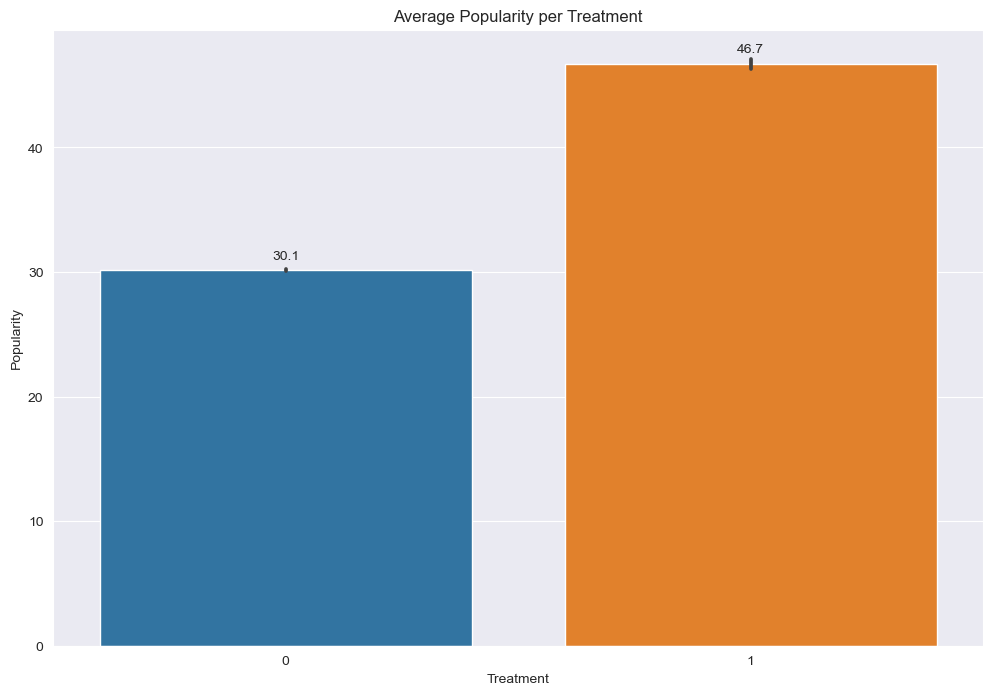

In [37]:
# plot average effect per treatment
_, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='treatment', y='effect', data=df, ax=ax)
ax.set_xlabel('Treatment')
ax.set_ylabel('Popularity')
ax.title.set_text('Average Popularity per Treatment')
# add values to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

Lastly, we can see that the average popularity is higher for explicit than for non-explicit, hence, we might indeed witness that the treatment affects the effect

In [10]:
df

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year,treatment,effect
0,0.9950,0.708,158648,0.1950,0.563000,10,0.1510,-12.428,1,0.0506,118.469,0.7790,1928,0,0
1,0.9940,0.379,282133,0.0135,0.901000,8,0.0763,-28.454,1,0.0462,83.972,0.0767,1928,0,0
2,0.6040,0.749,104300,0.2200,0.000000,5,0.1190,-19.924,0,0.9290,107.177,0.8800,1928,0,0
3,0.9950,0.781,180760,0.1300,0.887000,1,0.1110,-14.734,0,0.0926,108.003,0.7200,1928,0,0
4,0.9900,0.210,687733,0.2040,0.908000,11,0.0980,-16.829,1,0.0424,62.149,0.0693,1928,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,0.875,163800,0.4430,0.000032,1,0.0891,-7.461,1,0.1430,100.012,0.3060,2020,1,75
169905,0.0167,0.719,167468,0.3850,0.031300,8,0.1110,-10.907,1,0.0403,128.000,0.2700,2020,0,64
169906,0.5380,0.514,180700,0.5390,0.002330,7,0.1080,-9.332,1,0.1050,123.700,0.1530,2020,0,70
169907,0.0714,0.646,167308,0.7610,0.000000,1,0.2220,-2.557,1,0.0385,129.916,0.4720,2020,0,70
